In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# Clustering

Unter Clustering versteht man das zusammenfassen von Instanzen/Einheiten aufgrund von Ähnlichkeiten. Clustering Algorithmen gehören zu den  **unüberwachten Lernverfahren (unsupervised machine learning)**. Ziel dieser Methoden ist es selbständig Ähnlichkeiten in Datenpunkten zu erkennen und ähnliche Datenpunkte in Gruppen zusammenzufassen. 

Mehr Informationen zum Thema:

https://en.wikipedia.org/wiki/Cluster_analysis

und im spezielleren zu K-Means einem Cluster-Algorithmus:

https://en.wikipedia.org/wiki/K-means_clustering

und als Video:

https://www.youtube.com/watch?v=4b5d3muPQmA


Zuletzt haben wir gesehen, dass Ähnlichkeiten mit Hilfe von Abständen gemessen werden können. Dazu werden die Attribute der Instanzen ('gender', 'age, ...) als Dimensionen eines Datenpunktes in einem Hochdimensionalen Raum verstanden. Jede Dimension des Raumes beschreibt die Ausprägung einer bestimmten Eigenschaft (z.B. gender == female).

## K-Means 

K-Means ausgeführt und visualisiert anhand von Beispieldaten Punktwolken.

### Die Beispieldaten

In [2]:
# Erstelle ein Punktwolke mittels der Normalverteilung
x_werte = np.random.normal(0,1,1000)
y_werte = np.random.normal(0,1,1000)

# Erstelle eine zweite Punktwolke mittels der Normalverteilung
x_werte_2 = np.random.normal(10,0.2,1000)
y_werte_2 = np.random.normal(10,0.2,1000)

# Setze die zwei Punktworlken zu einem Datensatz zusammen
data_x = np.concatenate([x_werte, x_werte_2])
data_y = np.concatenate([y_werte, y_werte_2])

dataset = pd.DataFrame()

dataset['x'] = data_x
dataset['y'] = data_y

dataset.head()

,x,y
0,-0.449347,-1.575192
1,0.084983,-1.002143
2,-0.125574,-0.359562
3,-0.331443,-1.188241
4,0.139489,-0.054858


---

### Das Clustern

Mit Hilfe von sklearn ist das Clustern nicht viel mehr als ein paar Funktionsaufrufe:
1. Wir instanziieren ein KMeans-Objekt und initialisieren es mit der Anzahl der Cluster
2. Wir "trainieren" KMeans mit unseren Daten
3. Wir "predicten" dieselben Daten mit dem "trainierten" KMeans und speichern die Cluster-Zuordnung in einer neuen Spalte "cluster_nr_kmeans"

In [3]:
# object Instanziierung
kmeans = KMeans(n_clusters=2)#
# Training
kmeans.fit(dataset)
# Vorhersage
dataset['cluster_nr_kmeans'] = kmeans.predict(dataset)

Die Aufteilung in Training und Vorhersage ist nicht unbedingt notwendig, wird aber von sklearn so umgesetzt, um mit den anderen Machine Learning Methoden konform zu sein. Ergo, egal welches Verfahren, wir rufen immer fit() und dann predict() auf.

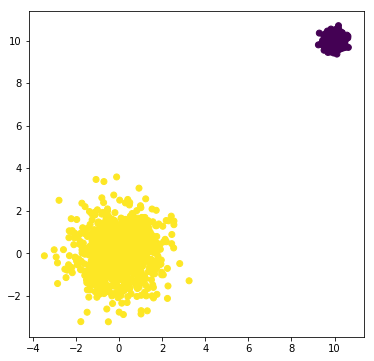

In [4]:
# plotte ich diesen Datensatz mit 'scatter'
plt.figure(1, figsize=(6, 6))
plt.scatter(data_x, data_y, c=dataset['cluster_nr_kmeans'])
plt.show();

**Aufgaben:**
- Erstelle zusätzliche Punktewolken.
- Visualisiere das Ergebnis, wenn die Anzahl der Wolken nicht mehr der Anzahl der Cluster übereinstimmt.